# Atelier 1 - Hello World - Classification d'images avec *tf.keras*

### Objectif :
- Découverte de Collab
- Pré-processing des données
- Création d'un modèle via l'API Keras incluse dans TensorFlow, *tf.keras*.
- Evaluation du modèle & Prédiction
- Visualisation des résultats

Lien vers la documentation de [TensorFlow](https://www.tensorflow.org/api_docs).


#◢  Import des librairies

Nous utiliserons les librairies de base pour la data science en Python
- Numpy est une bibliothèque destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux
- Pandas est une librairie permettant de manipuler facilement des données à analyser : manipuler des tableaux de données avec des étiquettes de variables (colonnes) et d'individus (lignes).
- Matplotlib est destinée à tracer et visualiser des données sous formes de graphiques. 
- Tensorflow pour le Deep Learning

In [39]:
import tensorflow as tf
from tensorflow import keras
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#◢  Chargement du jeu de données MNIST

Keras permet de charger de nombreux datasets avec `keras.datasets`.
Nous utiliserons le jeu de données MNIST *Modifier ou Mixed National Institute of Standards and Technology*, qui est une base de données de chiffres manuscrits.


La base MNIST est une base de données de chiffres écrits à la main. Elle regroupe 60000 images d'apprentissage et 10000 images de test. 
Ces images sont en noir et blanc, normalisées centrées et de 28 pixels de côté.

Pour l’historique de la création de cette base, voir [Yann LeCun](http://yann.lecun.com/exdb/mnist/).

Séparons le jeu de données d'entrainement en :
- un jeu de validation contenant 5000 images
- un jeu d'entrainement contenant 55000 images

In [40]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#◢  Exploration des données

Nous avons désormais 3 jeux de données :
- Le jeu de données d'entrainement qui contient 55000 images de tailles 28x28 pixels
- Le jeu de données de validation qui contient 5000 images de tailles 28x28 pixels
- Le jeu de données de test qui contient 10000 images de tailles 28x28 pixels


Lien vers la documentation de [Numpy ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html).

In [41]:
# TODO Afficher la taille de X_train 
X_train.shape

(55000, 28, 28)

In [42]:
# TODO Afficher la taille de X_valid
X_valid.shape

(5000, 28, 28)

In [43]:
# TODO Afficher la taille de X_test
X_test.shape

(10000, 28, 28)

Chaque pixel a une valeur comprise entre 0 et 255

In [44]:
X_train[0][10:15]

array([[  0,   0, 226, 254, 208, 199, 199, 199, 199, 139,  61,  61,  61,
         61,  61, 128, 222, 254, 254, 189,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,  38,  82,  13,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  34, 213, 254, 254, 115,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  84, 254, 254, 234,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  84, 254, 254, 234,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 106, 157, 254, 254, 243,  51,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

Nous pouvons afficher une image en utilisant la fonction de Matplotlib `imshow()`, avec la carte des couleurs `'binary'` :

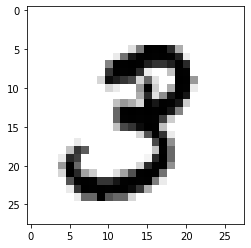

In [45]:
plt.imshow(X_train[1], cmap="binary")
plt.show()

Les labels sont des classes allant de 0 à 9

In [46]:
y_train[:10]

array([7, 3, 4, 6, 1, 8, 1, 0, 9, 8], dtype=uint8)

Regardons quelques images du jeu de données :

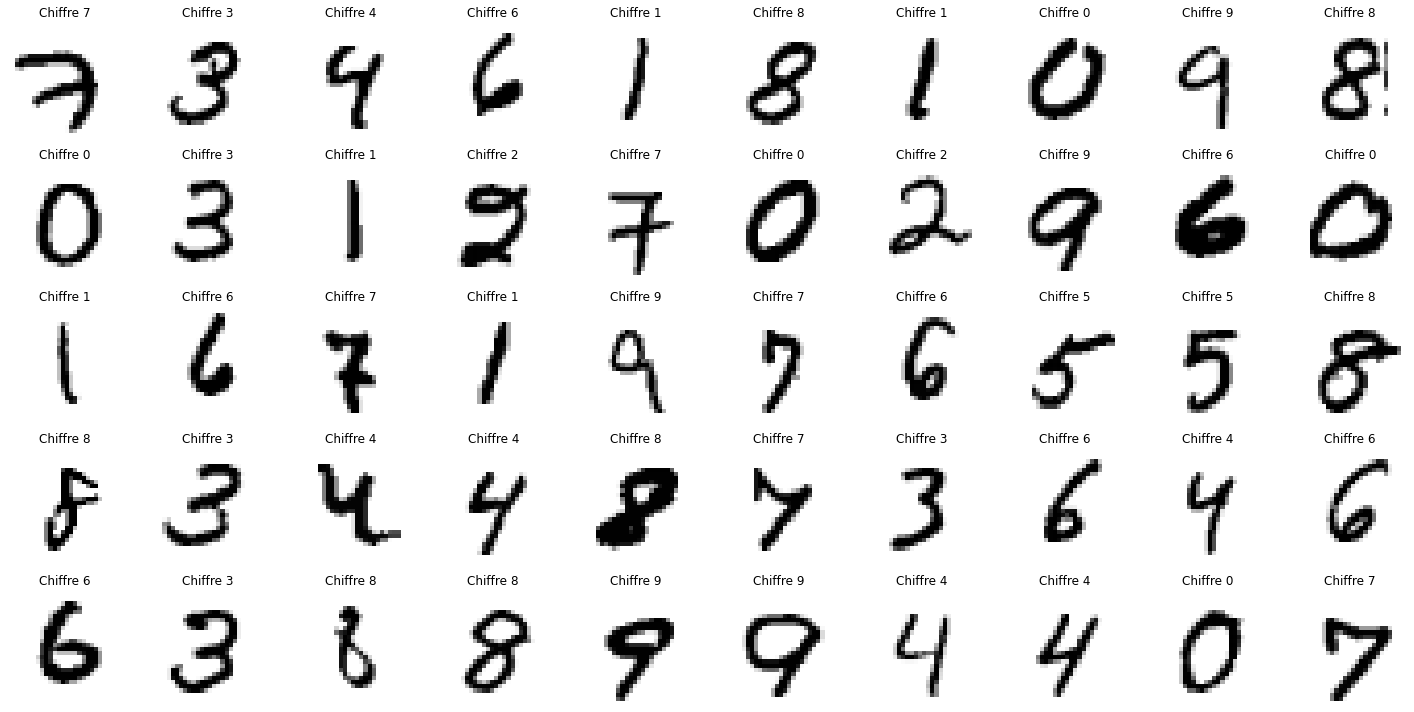

In [47]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*2, n_rows*2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title('Chiffre ' + str(y_train[index]))
plt.tight_layout()
plt.show()

#◢  Pré-Processing
Les images étant dans l'échelle [grayscale](https://en.wikipedia.org/wiki/Grayscale), les valeurs varient de 0 à 255.

La normalisation est une méthode de prétraitement des données qui permet de réduire la complexité des modèles.

Afin de normaliser (centrer) les données, nous allons implémenter la fonction Min-Max scaling dans la fonction `normalize_grayscale()`. Après la mise à l'échelle, les valeurs des pixels des données d'entrée iront de 0.1 à 0.9.

Min-Max Scaling:
$
X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}
$

Plus d'informations sur la [normalisation](https://dataanalyticspost.com/Lexique/normalisation/)







<img class="tfo-display-only-on-site" src="http://datactik.com/other/Mean_Variance_Image.png" height="300"/>

In [48]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data

    a = 0.1
    b = 0.9
    image_data_min = image_data.min()
    image_data_max = image_data.max()
    return a + ((image_data - image_data_min)*(b-a))/(image_data_max - image_data_min)


### VERIFIER VOTRE IMPLEMENTATION AVEC LES TESTS UNITAIRES CI-DESSOUS ###
# Test Cases
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])),
    [0.1, 0.103137254902, 0.106274509804, 0.109411764706, 0.112549019608, 0.11568627451, 0.118823529412, 0.121960784314,
     0.125098039216, 0.128235294118, 0.13137254902, 0.9],
    decimal=3)
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 10, 20, 30, 40, 233, 244, 254,255])),
    [0.1, 0.103137254902, 0.13137254902, 0.162745098039, 0.194117647059, 0.225490196078, 0.830980392157, 0.865490196078,
     0.896862745098, 0.9])


train_features = normalize_grayscale(X_train)
val_features = normalize_grayscale(X_valid)
test_features = normalize_grayscale(X_test)

print('Tests Passed!')

Tests Passed!


#◢  Construction d'un modèle 

Construction d'un modèle `Sequential` avec l'API `keras.models.Sequential`, sans aucun argument, et avec 3 couches en utilisant la méthode `add()` :
  * Une couche `Flatten` (`keras.layers.Flatten`) pour convertir chaque image de taille 28x28 image en un simple tableau de 784 pixels. Comme cette couche est la première de notre modèle, nous devons spécifier l'argument `input_shape`.
  * Une couche `Dense` (`keras.layers.Dense`) avec 50 neurones (également appelés units), et la fonction d'activation `"relu"`.
  * Pour finir une couche `Dense` avec 10 neurones (1 par classe), et avec la fonction d'activation `"softmax"` activation pour s'assurer que la somme de toutes les probabilités des classe estimées pour chaque image est égale à 1.


  Plus d'infos sur la fonction [Softmax](https://fr.wikipedia.org/wiki/Fonction_softmax)

In [49]:
model = keras.models.Sequential()
### TODO ###
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Nous pouvons également utiliser une autre annotation.
Au lieu d'utiliser la méthode `add()`, nous pouvons lister les couches dans le constructeur.

In [50]:
### TODO ###
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Utilisons l'attribut `layers` de model pour afficher la liste des couches

In [51]:
### TODO ###
model.layers

Appelons la méthode `summary()` sur le model pour afficher un résumé de la structure du réseau.

In [52]:
### TODO ###
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


#◢  Compilation du modèle

Après avoir créé le modèle, nous devons appeler la méthode `compile()`afin de spécifier la fonction de cout (`loss` function) et l'`optimizer` à utiliser. 

Plus d'infos sur :
- la [fonction de cout](https://developers.google.com/machine-learning/glossary?hl=fr#loss)
- l'[optimizer](https://developers.google.com/machine-learning/glossary?hl=fr#optimizer)

Dans ce TP, nous utiliserons la fonction de cout `"sparse_categorical_crossentropy"`, et l'optimiseur suivant `keras.optimizers.SGD(lr=0.01)`(stochastic gradient descent avec un learning rate à 0.01).

Nous pouvons également spécifier une liste de métriques additionelles qui pourront être mesurée lors de la phase d'apprentissage à titre indicatif pour le développeur du modèle comme `metrics=["accuracy"]`. 

**Note**: Dans la documentation de Keras, nous trouverons d'autres fontions de cout `keras.losses`, d'autres métriques `keras.metrics` et d'autres optimiseurs `keras.optimizer`.

In [53]:
### TODO ###
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=0.01),
             metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#◢  Entrainement du modèle

Notre modèle est désormais prêt à être entrainé. Appelons la méthode `fit()`, en passant les paramètres d'entrées (`train_features`) et les valeurs à prédire (`y_train`).

Définissons :
- le nombre d'epochs `epochs=5`
- les données de validation `validation_data=(val_features, y_valid)`

**Note**: La méthode `fit()` retourne un objet `History` qui contient les statistiques d'entrainement. N'oublions pas de récupérer cet objet (`history = model.fit(...)`).

In [54]:
### TODO ###
history = model.fit(train_features, y_train, epochs=5,
                    validation_data=(val_features, y_valid))

Epoch 1/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7766 - accuracy: 0.8139 - val_loss: 0.4197 - val_accuracy: 0.8916
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3880 - accuracy: 0.8931 - val_loss: 0.3341 - val_accuracy: 0.9108
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3360 - accuracy: 0.9051 - val_loss: 0.2975 - val_accuracy: 0.9198
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.9121 - val_loss: 0.2759 - val_accuracy: 0.9242
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2888 - accuracy: 0.9179 - val_loss: 0.2642 - val_accuracy: 0.9310


Regardons les valeurs de la fonction de cout et de l'accuracy sur les 2 jeux de données (train et validation)

In [55]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

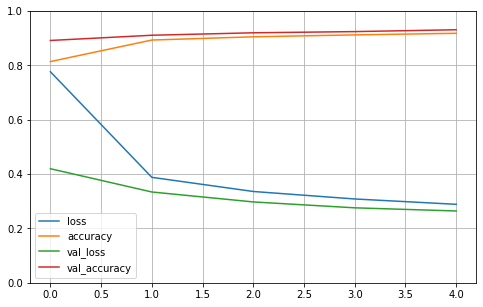

In [56]:
plot_learning_curves(history)

Relançons `model.fit()` avec 3 epochs, que se passe-t-il ?

In [57]:
### TODO ###
history = model.fit(train_features, y_train, epochs=3,
                    validation_data=(val_features, y_valid))

Epoch 1/3
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2718 - accuracy: 0.9234 - val_loss: 0.2504 - val_accuracy: 0.9316
Epoch 2/3
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2574 - accuracy: 0.9273 - val_loss: 0.2361 - val_accuracy: 0.9364
Epoch 3/3
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2443 - accuracy: 0.9314 - val_loss: 0.2252 - val_accuracy: 0.9396


#◢  Evaluation du modèle
Appelons la méthode `evaluate()` sur le modèle précédement créé sur le jeu de données de test (`test_features` et `y_test`). Cette méthode va calculer la fonction de cout (ici cross-entropy) sur le jeu de test, ainsi que les métriques additionnelles (dans ce cas, l'accuracy). 

Votre modèle doit atteindre une accuracy de plus de 90% sur le jeu de test.

In [58]:
### TODO ###
model.evaluate(test_features, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2323 - accuracy: 0.9353


[0.23232030868530273, 0.9352999925613403]

#◢  Prédiction
Appelons la méthode `predict()` sur le modèle afin d'estimer la probabilité de chaque classe pour chaque instance (pour une meilleure lisibilité, utilisons la méthode `round()` sur les probabilités générées):

In [59]:
### TODO ###
y_proba = model.predict(test_features)
y_proba[:10].round(3)

array([[0.   , 0.   , 0.   , 0.004, 0.   , 0.   , 0.   , 0.994, 0.   ,
        0.001],
       [0.003, 0.   , 0.977, 0.008, 0.   , 0.006, 0.005, 0.   , 0.001,
        0.   ],
       [0.   , 0.979, 0.008, 0.002, 0.   , 0.001, 0.001, 0.004, 0.004,
        0.   ],
       [0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.001, 0.   , 0.955, 0.001, 0.001, 0.004, 0.004,
        0.034],
       [0.   , 0.983, 0.003, 0.002, 0.   , 0.   , 0.   , 0.007, 0.004,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.978, 0.005, 0.   , 0.   , 0.008,
        0.009],
       [0.   , 0.001, 0.004, 0.013, 0.036, 0.006, 0.   , 0.008, 0.01 ,
        0.92 ],
       [0.002, 0.   , 0.006, 0.   , 0.006, 0.015, 0.971, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.034, 0.   , 0.   , 0.04 , 0.005,
        0.922]], dtype=float32)

A partir des probabilités des différentes valeurs, déduisons-en la valeur prédite (celle qui a le % maximum => utilisons la fonction `argmax`)

In [60]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

#◢  Visualisation des prédictions 

Méthodes utilitaires pour afficher une image et un bar chart représentant la probabilité des prédictions pour chaque chiffre de 0 à 9 (les prédictions en bleu sont les prédictions correctes et en rouge celles incorrectes)

In [61]:
def plot_prediction_image(predictions_array, true_label, img):

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = "blue" if predicted_label == true_label else "red"

    plt.xlabel("Chiffre prédit {} {:2.0f}% ({})".format(predicted_label,
                                                        np.max(predictions_array) *100,
                                                        true_label),
                                                        color=color)
    
def plot_prediction_bar_chart(predictions_array, true_label):
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    plt.grid(False)
    plt.xticks(range(10))
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Affichage de l'image à prédire et de la probabilité des prédictions pour chaque chiffre de 0 à 9 pour la première image

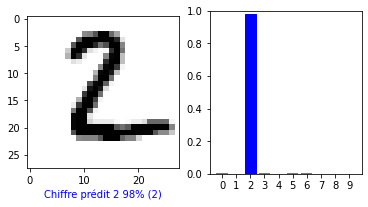

In [62]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_prediction_image(y_proba[i], y_test[i], X_test[i])
plt.subplot(1,2,2)
plot_prediction_bar_chart(y_proba[i], y_test[i])
plt.show()

## Affichons les 20 premiers chiffres et visualisons les prédictions


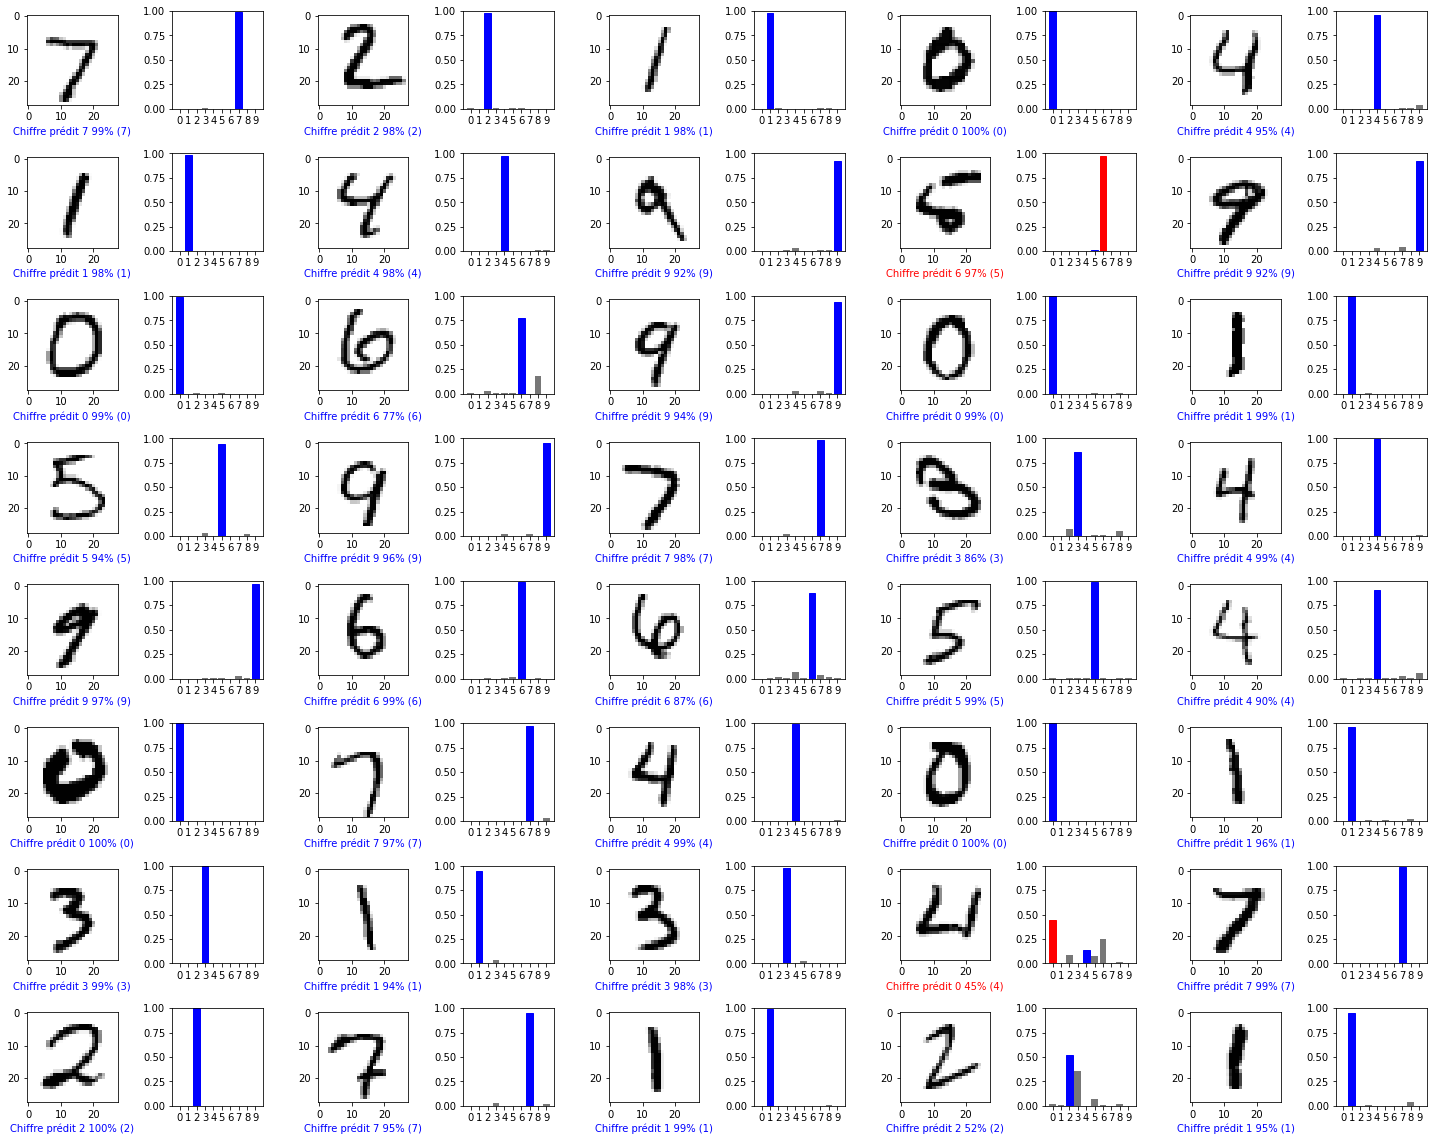

In [63]:
num_rows = 8
num_cols = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba[index], y_test[index], X_test[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba[index], y_test[index])
plt.tight_layout()
plt.show()



## Focus sur les images mal prédites

In [64]:
y_proba_false = y_proba[y_pred != y_test]
y_test_false = y_test[y_pred != y_test]
X_test_false = X_test[y_pred != y_test]

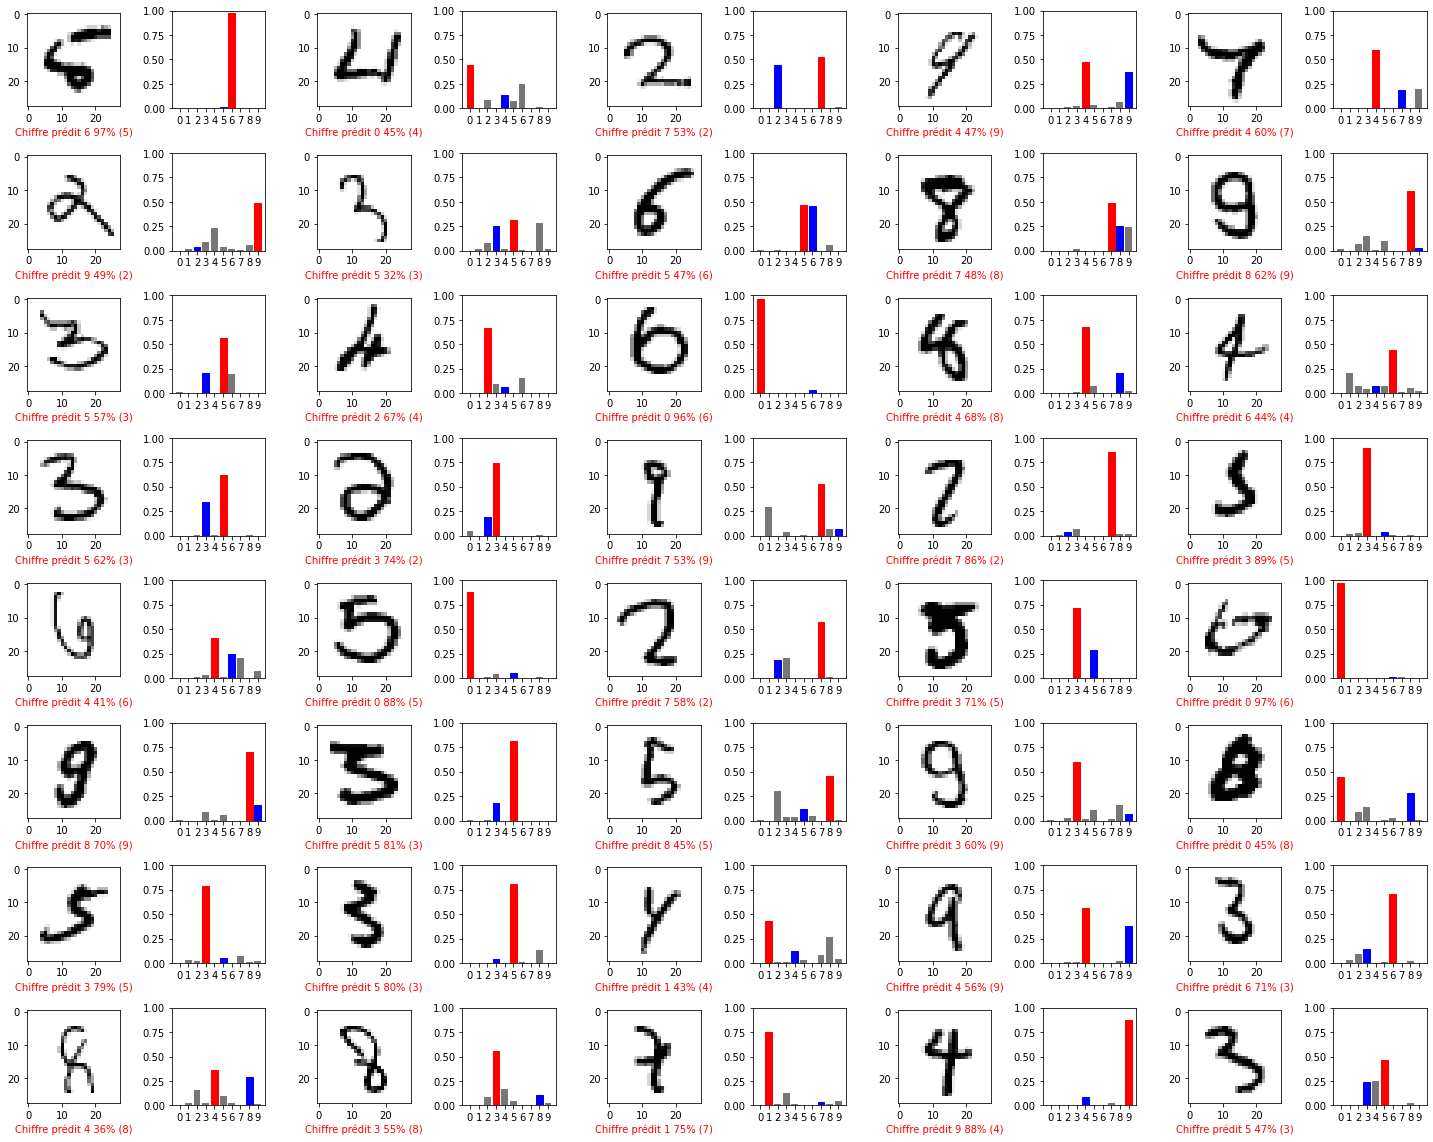

In [65]:
num_rows = 8
num_cols = 5
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, 2*num_cols, 2*index+1)
        plot_prediction_image(y_proba_false[index], y_test_false[index], X_test_false[index])
        plt.subplot(num_rows, 2*num_cols, 2*index+2)
        plot_prediction_bar_chart(y_proba_false[index], y_test_false[index])
plt.tight_layout()
plt.show()